# <p style="text-align:center"> <span style="color:blue">[WMCS011-05] Pattern Recognition (for CS) 2022-2023 </span></p>

## <p style="text-align:center"> $2^{nd}$ practical: Convolutional neural networks</p>

### $$ \text{Group 7} $$
### $$ \text{Tom Eijkelenkamp (S1889338)}  \quad \& \quad \text{Ilse Harmers  (S4016335)} $$

## **Information and instructions**
*   <span style="color:red">**DEADLINE**</span>  Tuesday 20 December 2022 **before** 23:59PM. Hand in this file *containing your code and answers added* through Brightspace.
*   This is a group assignment (should be done in pairs). 
*  Insert a Markdown cell (where needed) and **add the formulas** you used to answer a question, as well as a short description of how you came up with your solution.
*   Some exercises ask you to find a specific value or expression or ask you for an interpretation. Insert a Markdown cell and provide your answers briefly.
* Make sure to include all the necessary print statements and remove the extra ones that were only used for testing your implementation. 
*   Please ensure that all your figures are properly labeled with title, axis labels, and legend if you plot multiple curves in one graph.
*   Structure your code using comments and separate code cells where necessary, and be sure to indicate which part of your code belongs to which question.
*   To test your code, we will run all your code cells from scratch - so make sure all results can be reproduced!
* For any questions, you can contact us at [pr2022rug@gmail.com](pr2022rug@gmail.com).

## Table of Contents
* [Exercise 1 - Get a running ResNet for image classfication (30pt)](#chapter1)
* [Exercise 2 - Understand and tweak the codes (30 pt)](#chapter2)
* [Exercise 3 - Construct your own convolutional network for image classification (40 pt)](#chapter3)

* [Contributions](#chapter4)

In this assignment, you will gain some hands-on experience in using *Convolutional Neural Networks (CNNs)*.


You are highly recommended to use Google Colab to set up your experimental environment. Colab is a free online platform to enable writing and executing arbitrary python code through the browser. It is a hosted Jupyter Notebook service that requires no setup to use while providing free access to computing resources including GPUs. For detailed information, please have a look [here](https://colab.research.google.com/). 


**PS** The code used in this exercise is partly taken from [this](https://github.com/kuangliu/pytorch-cifar) GitHub repository. If you are interested in the full version with more examples of other CNN architectures, please check the repo. 

In [1]:
# Imported libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

As a **general note** for this notebook, it is not advisable to re-run the cells where the main function from *main_modified.py* (our modified version of *main.py*) is called. This is due to the relatively long runtime (even with GPU) when, e.g., executing the code as done in **Step 5** (which took approximately 45 minutes). Furthermore, during our runs in Exercise 2 and 3, we might have used different learning rates and/or different functions each time we executed the code such that running the cell might not give the same result at this moment. Our other option would have been to make different versions of our script each time we modified a parameter or a code line, which seemed a bit excessive.

# <span style="color:blue">Exercise 1 - Get a running ResNet for CIFAR-10 image classfication (30pt)  <a class="anchor" id="chapter1"></a></span>


**Step 1:** Upload the file *[Surname1]\_[Surname2]\_[GroupNumber].ipynb* to your google drive and then open it through colab. 

**Step 2:** On Brightspace, you will find the PyTorch implementation of ResNet-18. Unzip the file and upload the folder to your google drive.

**Step 3:** Mount your Google Drive to the colab notebook through the code snippet below.

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/Universiteit/PatternRecognition/Assignments/PR_Lab2/'  # Change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Step 4:** Modify the *main.py* to keep track of the classification performance, e.g., loss and accuracy metrics, for both the training and test set throughout the epochs.

We have modified *main.py* such that the mean loss and accuracy metrics of each epoch are saved to a .csv file (for both the training and test set). Our modified version of *main.py* can be found in *main_modified.py*.

**Step 5:** Execute the code. Before running it, make sure to set:

$$ \textbf{Runtime -> change Runtime type to 'GPU'}$$ 
<br>

$$ \text{Otherwise, it may take forever to run the code!} $$


In [ ]:
# Run the main function
! python /content/gdrive/MyDrive/Universiteit/PatternRecognition/Assignments/Lab2/ResNet18_cifar10_lab2/main_modified.py  # Change 'your_project_folder' to your project folder

==> Preparing data..
100% 170498071/170498071 [00:13<00:00, 13043805.03it/s]
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
==> Building model..

Epoch: 0
 [================================================================>]  Step: 578ms | Tot: 37s961ms | Loss: 1.870 | Acc: 31.484% (15742/50000) 391/391 
 [================================================================>]  Step: 23ms | Tot: 3s432ms | Loss: 1.502 | Acc: 43.940% (4394/10000) 100/100 
Saving..

Epoch: 1
 [================================================================>]  Step: 66ms | Tot: 38s773ms | Loss: 1.330 | Acc: 51.336% (25668/50000) 391/391 
 [================================================================>]  Step: 25ms | Tot: 2s731ms | Loss: 1.294 | Acc: 53.770% (5377/10000) 

**Step 6:** Observe the results you got, e.g., the corresponding loss or accuracy for a certain epoch. Plot the results you got in terms of loss and accuracy for both the training and test sets as the number of epochs increases (one figure for the loss and one for the accuracy). The *x*-axis denotes the epoch number while the *y*-axis indicates the corresponding loss and accuracy.

*Your answers here:*




We have plotted the loss and accuracy for both the training and test sets as the number of epochs increases, for a total of 80 epochs. In our case, this was the maximum number of epochs that we could train the model for before reaching the GPU limit of Google Colaboratory. Regarding the training set, we can observe that the loss exponentially decreases as the number of epochs increases; the accuracy first steeply increases and then stagnates around ~90% after 20-30 epochs. Regarding the test set, we can observe roughly the same behaviour as with the training set, except for the oscillating trend (the "jumping up and down" trend) in both the loss and accuracy metrics.

Averaged training accuracy: 89.5 +/- 0.2%
Averaged test accuracy: 82.6 +/- 1.7%



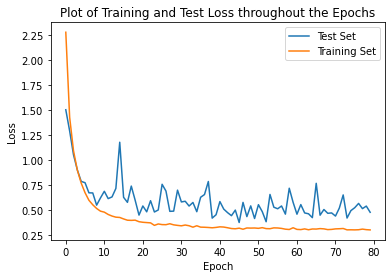

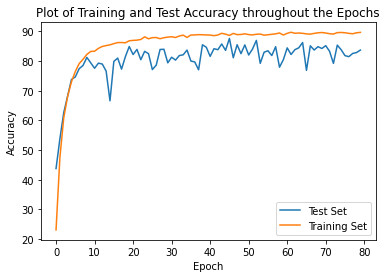

In [7]:
# Loading in the results from the previous step.
df = pd.read_csv(root_path+'Results/results_Q1.csv')

nr_epochs = 80   # total number of epochs
# Mean training accuracy over last 10% epochs.
mean_train_acc = np.mean(df['Training Accuracy'][-int(nr_epochs*0.1):])
# Standard deviation in training accuracy over last 10% epochs.
std_train_acc = np.std(df['Training Accuracy'][-int(nr_epochs*0.1):])
print("Averaged training accuracy: {:.1f} +/- {:.1f}%".format(mean_train_acc, std_train_acc))
# Mean test accuracy over last 10% epochs.
mean_test_acc = np.mean(df['Test Accuracy'][-int(nr_epochs*0.1):])
# Standard deviation in test accuracy over last 10% epochs.
std_test_acc = np.std(df['Test Accuracy'][-int(nr_epochs*0.1):])
print("Averaged test accuracy: {:.1f} +/- {:.1f}%".format(mean_test_acc, std_test_acc))

print()

# Plotting the training and test loss throughout the epochs.
fig_loss = plt.figure()
frame_loss = fig_loss.add_subplot(1, 1, 1)
frame_loss.plot(df['Epoch'], df['Test Loss'], label='Test Set')
frame_loss.plot(df['Epoch'], df['Training Loss'], label='Training Set')
frame_loss.set_xlabel('Epoch')
frame_loss.set_ylabel('Loss')
frame_loss.set_title('Plot of Training and Test Loss throughout the Epochs')
frame_loss.legend()

# Plotting the training and test accuracy throughout the epochs.
fig_acc = plt.figure()
frame_acc = fig_acc.add_subplot(1, 1, 1)
frame_acc.plot(df['Epoch'], df['Test Accuracy'], label='Test Set')
frame_acc.plot(df['Epoch'], df['Training Accuracy'], label='Training Set')
frame_acc.set_xlabel('Epoch')
frame_acc.set_ylabel('Accuracy')
frame_acc.set_title('Plot of Training and Test Accuracy throughout the Epochs')
frame_acc.legend()

plt.show()

# <span style="color:blue">Exercise 2 - Understand \& tweak the code (30pt)  <a class="anchor" id="chapter2"></a></span>



**<span style="color:blue"> A. </span> Data-related questions:**
1. **Briefly describe the $\text{CIFAR-10}$ dataset used in this implementation, incl. the types of images and categories.**
<br>

2. **What are the $\text{transformations}$ used for data augmentation?**

*Your answers here:*

1. The $\text{CIFAR-10}$ dataset contains 60,000 colour images (32 by 32 pixels) spread over 10 image classes: "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship" and "truck" [1]. Each class consists of 5000 training images and 1000 test images, which are randomly chosen from the available 6000 images per class. Note that the class "automobile" does not contain images of trucks or pickup trucks, and the class "truck" does not contain images of pickup trucks.

2. The transformations used for data augmentation in *main.py* (and *main_modified.py*) are slightly different between the training and test sets. For both sets, the images are transformed to tensors and then each color channel of the images is normalized with its respective mean and standard deviation [2]. Additionally, the training images are cropped at a random location and horizontally flipped (i.e., flipped along the horizontal axis in the center of the image) for a given probability, in this case $p = 0.5$. Regarding the random crop, in order to ensure an image size of 32 by 32 pixels, the training images are padded on each border.   

 **<span style="color:blue"> B. </span> Model-related questions:**

1. **What is an optimizer? What is the initial learning rate? You can change the value of the initial learning rate and check how it affects the model performance (fast or slow convergence). You can add here the relevant figures.**
<br>

2. **Confirm the size of the feature maps after each convolution block. Display the feature maps. You will need a library such as $matplotlib$ or $plotly$ to visualize the images.**

*Your answers here:*

1. An optimizer can be described as an algorithm which aims to minimize the loss function by updating the weights and learning rate accordingly. For example, for gradient descent we have 

$$ w_{k+1} = w_k - \eta \cdot \nabla f(w_k)$$

as the update rule for the weights, as described in Lecture 4 of this course. In this equation, the variable $\eta$ represents the learning rate and affects the step size which we take towards a minimum. For Exercise 1, we have used a learning rate of 0.1. Based on our results from the subsequent code cells, we can observe that increasing the learning rate to 0.2 or 0.4 produces larger amplitudes in the 'jumpy' behaviour of the test loss and accuracy, which can be an indication of increased instability in the algorithm. Decreasing the learning rate by a factor of 2 to 0.05 subsequently appears to decrease these amplitudes and improve the overall metrics for the loss and accuracy of the training and test sets (with the learning rate of 0.4 resulting in the worst overall performance based on visual inspection). 

In [ ]:
# Run the main function
! python /content/gdrive/MyDrive/Universiteit/PatternRecognition/Assignments/Lab2/ResNet18_cifar10_lab2/main_modified.py  # Change 'your_project_folder' to your project folder

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0
 [================================================================>]  Step: 578ms | Tot: 38s843ms | Loss: 1.602 | Acc: 41.234% (20617/50000) 391/391 
 [================================================================>]  Step: 25ms | Tot: 2s743ms | Loss: 1.547 | Acc: 47.130% (4713/10000) 100/100 
Saving..

Epoch: 1
 [================================================================>]  Step: 64ms | Tot: 38s114ms | Loss: 1.071 | Acc: 61.840% (30920/50000) 391/391 
 [================================================================>]  Step: 24ms | Tot: 2s713ms | Loss: 1.170 | Acc: 58.830% (5883/10000) 100/100 
Saving..

Epoch: 2
 [=======================================

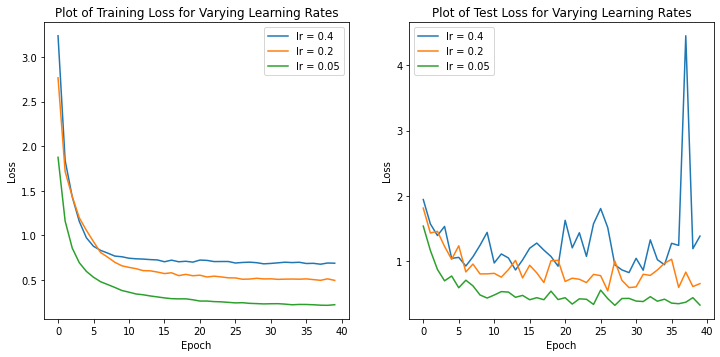

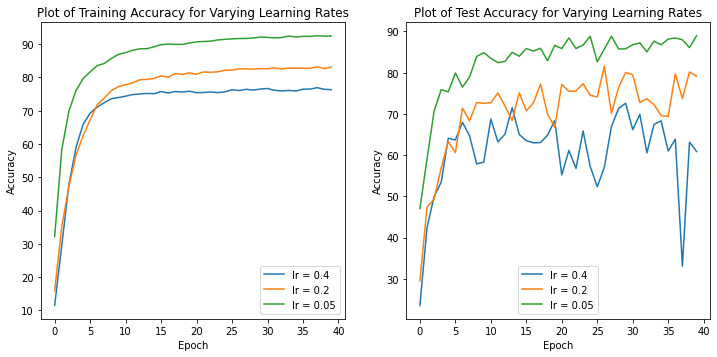

In [8]:
# Loading in the results for different learning rates.
df_lr04 = pd.read_csv(root_path+'Results/results_Q2A_lr04.csv')   # learning rate = 0.4
df_lr02 = pd.read_csv(root_path+'Results/results_Q2A_lr02.csv')   # learning rate = 0.2
df_lr005 = pd.read_csv(root_path+'Results/results_Q2A_lr005.csv')   # learning rate = 0.05

# Plotting the training and test loss throughout the epochs for varying learning rates.
fig_loss = plt.figure(figsize=[12, 12])
frame_trainloss = fig_loss.add_subplot(2, 2, 1)
frame_trainloss.plot(df_lr04['Epoch'], df_lr04['Training Loss'], label='lr = 0.4')
frame_trainloss.plot(df_lr02['Epoch'], df_lr02['Training Loss'], label='lr = 0.2')
frame_trainloss.plot(df_lr005['Epoch'], df_lr005['Training Loss'], label='lr = 0.05')
frame_trainloss.set_xlabel('Epoch')
frame_trainloss.set_ylabel('Loss')
frame_trainloss.set_title('Plot of Training Loss for Varying Learning Rates')
frame_trainloss.legend()

frame_testloss = fig_loss.add_subplot(2, 2, 2)
frame_testloss.plot(df_lr04['Epoch'], df_lr04['Test Loss'], label='lr = 0.4')
frame_testloss.plot(df_lr02['Epoch'], df_lr02['Test Loss'], label='lr = 0.2')
frame_testloss.plot(df_lr005['Epoch'], df_lr005['Test Loss'], label='lr = 0.05')
frame_testloss.set_xlabel('Epoch')
frame_testloss.set_ylabel('Loss')
frame_testloss.set_title('Plot of Test Loss for Varying Learning Rates')
frame_testloss.legend()

# Plotting the training and test accuracy throughout the epochs for varying learning rates.
fig_acc = plt.figure(figsize=[12, 12])
frame_trainacc = fig_acc.add_subplot(2, 2, 1)
frame_trainacc.plot(df_lr04['Epoch'], df_lr04['Training Accuracy'], label='lr = 0.4')
frame_trainacc.plot(df_lr02['Epoch'], df_lr02['Training Accuracy'], label='lr = 0.2')
frame_trainacc.plot(df_lr005['Epoch'], df_lr005['Training Accuracy'], label='lr = 0.05')
frame_trainacc.set_xlabel('Epoch')
frame_trainacc.set_ylabel('Accuracy')
frame_trainacc.set_title('Plot of Training Accuracy for Varying Learning Rates')
frame_trainacc.legend()

frame_testacc = fig_acc.add_subplot(2, 2, 2)
frame_testacc.plot(df_lr04['Epoch'], df_lr04['Test Accuracy'], label='lr = 0.4')
frame_testacc.plot(df_lr02['Epoch'], df_lr02['Test Accuracy'], label='lr = 0.2')
frame_testacc.plot(df_lr005['Epoch'], df_lr005['Test Accuracy'], label='lr = 0.05')
frame_testacc.set_xlabel('Epoch')
frame_testacc.set_ylabel('Accuracy')
frame_testacc.set_title('Plot of Test Accuracy for Varying Learning Rates')
frame_testacc.legend()

plt.show()

2. We need to confirm the size of the feature maps after each convolution block and display the feature maps. In order to confirm this, we will check the size of the feature maps after each layer using forward hooks. Our code is based on the discussion in [3]. From our results displayed below, we can observe that the size of the feature maps after each convolution block is given by: [32, 32] ('conv1'), [32, 32] ('layer1'), [16, 16] ('layer2'), [8, 8] ('layer3') and [4, 4] ('layer4'). From Lecture 5, we have that the output size is given by

$$\frac{W - F + 2P}{S} + 1,$$

where $W$ specifies the width of the input image, $F$ the kernel size and $S$ the stride. For the layer 'conv1', we have $W = 32$, $F = 3$, $P = 1$ and $S = 1$ such that the output size is equal to 

$$\frac{32 - 3 + 2 \cdot 1}{1} + 1 = 31 + 1 = 32$$

which is a match. For 'layer1', we have the same input width, filter size, padding and stride which then also gives an output size of 32. For 'layer2', we have $S=2$ such that

$$\frac{32 - 3 + 2 \cdot 1}{2} + 1 = 15.5 + 1 = 16.5.$$

Comparing this result to the feature map's size of [16, 16], we can observe that they match if the computed output size is rounded down to 16. For 'layer3', we have that $S=2$ and $W = 16$ for the input size:

$$\frac{16 - 3 + 2 \cdot 1}{2} + 1 = 7.5 + 1 = 8.5,$$

which matches the size of the corresponding feature map if rounded down to 8. For 'layer4', we have $S = 2$ and $W = 8$:

$$\frac{8 - 3 + 2 \cdot 1}{2} + 1 = 3.5 + 1 = 4.5,$$

which matches the size of the corresponding feature map if rounded down to 4.

In [ ]:
# Run the main function
! python /content/gdrive/MyDrive/Universiteit/PatternRecognition/Assignments/Lab2/ResNet18_cifar10_lab2/main_modified.py  # Change 'your_project_folder' to your project folder

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..


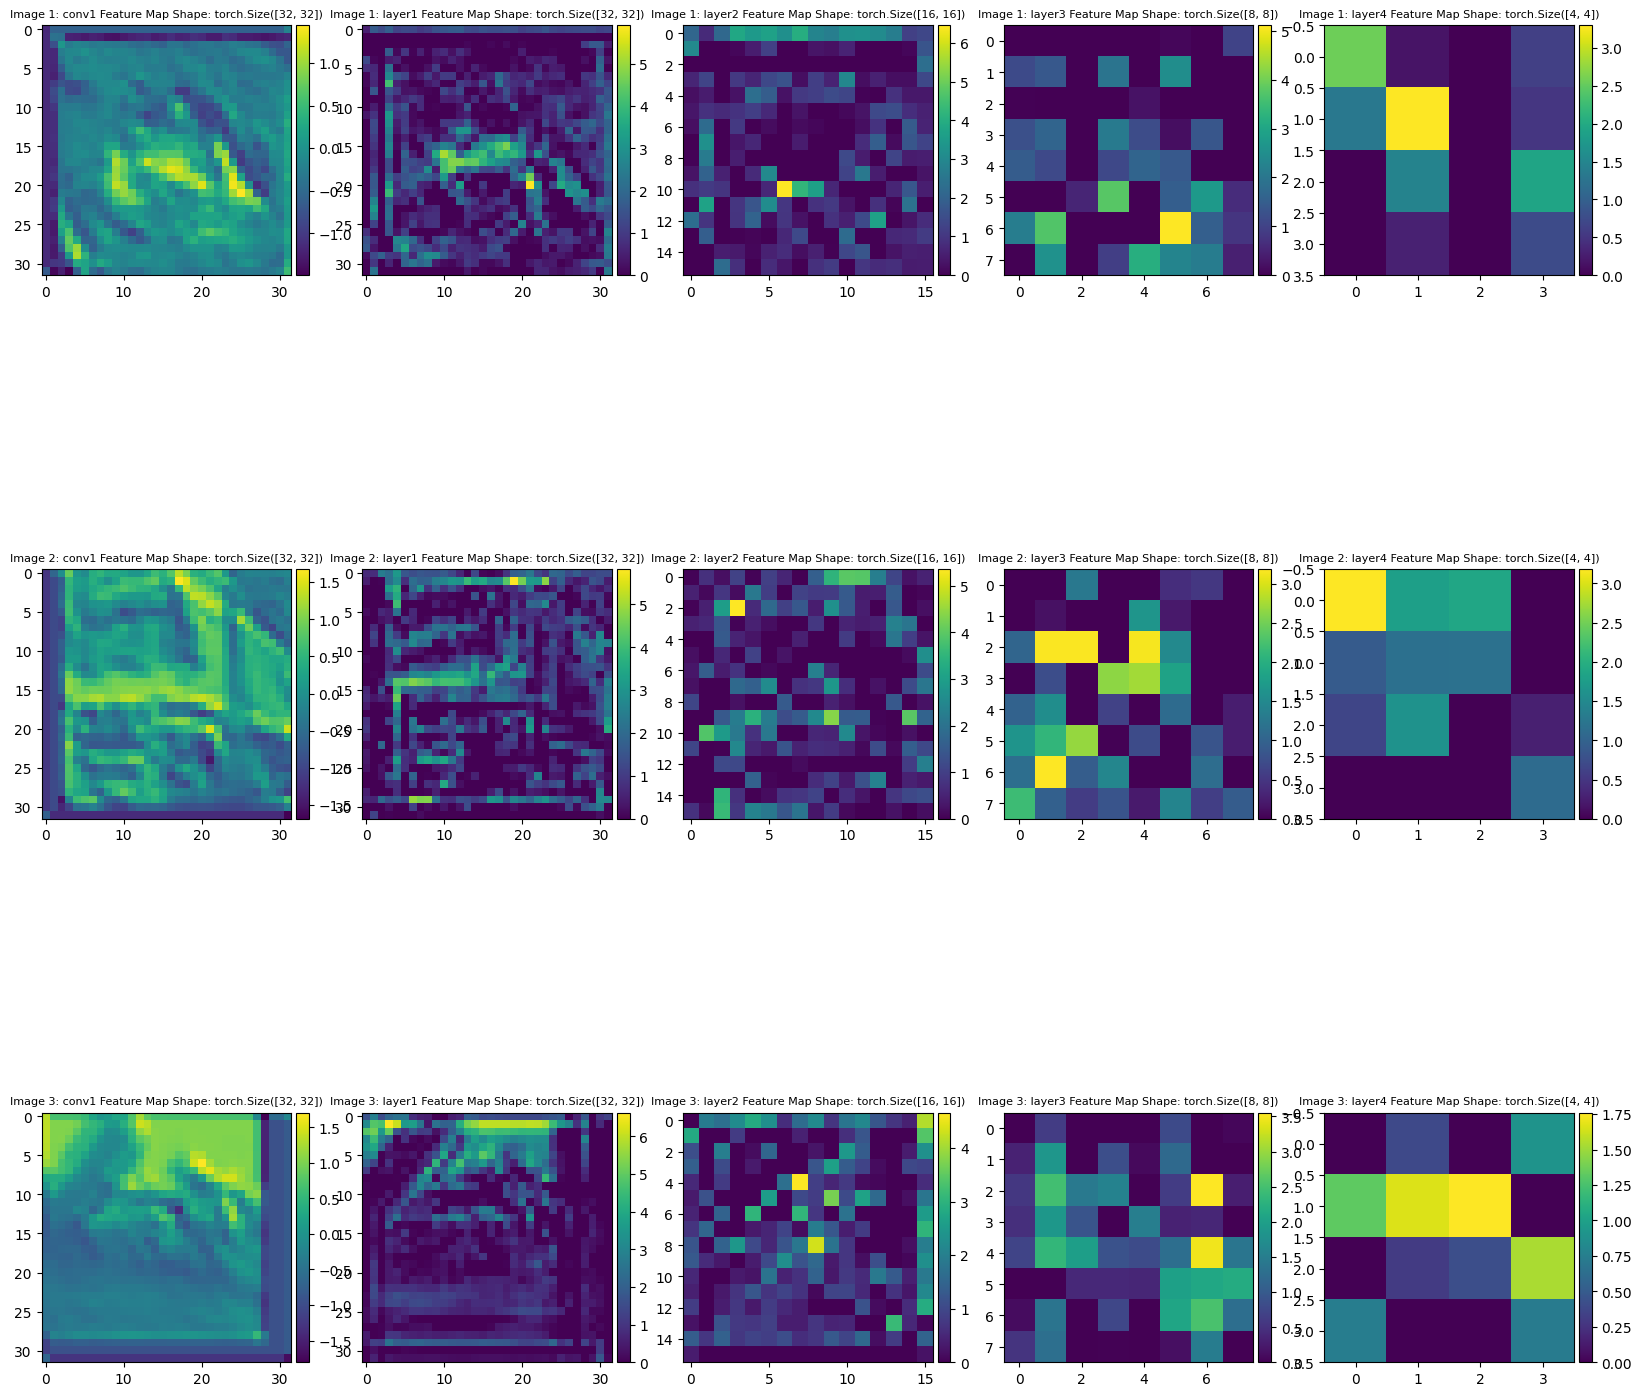

In [9]:
"""In this cell, we are plotting the feature maps of three images
after each convolution block. Ideally, we would have liked to plot the images 
a bit larger than (most likely) currently displayed, but the only option would have been to 
plot all the images one by one (as far as we know) which appears quite unorganized."""

Image(filename=root_path+'/Images/Figure_Q2B2_image.png')

# <span style="color:blue">Exercise 3 - Construct your own convolutional network for CIFAR-10 image classification (40pt)  <a class="anchor" id="chapter3"></a></span>


**Replace the $\text{ResNet-18}$ with a convolutional neural network $\text{designed by yourself}$. This network should have four (4) layers with trainable parameters. Add a figure to describe the architecture of your CNN. Specify the corresponding $\text{hyper-parameters}$ and $\text{trainable parameters}$ used in every layer of your network. Calculate manually the output size of each layer using the equations provided in the lecture slides. What is the total number of trainable parameters of your network? Report the results you get after a certain number of epochs and compare them with the results from ResNet-18.**


*Your answers here:*

We have to replace the ResNet-18 network with a 4-layer convolutional neural network (CNN) designed by ourselves. The architecture of our CNN consists of three convolution layers and one fully connected layer, and is displayed in the subsequent code cells. Note that the source code of our model can be found in the directory 'models'. In between the layers, we perform batch normalization and apply *LeakyRelu* as our activation function (to prevent neurons from 'dying' as described in Lecture 4). If we consider the definition of 'hyperparameter' referenced in [4], then our hyperparameters are given as follows: 



*   learning rate = 0.1;
*   batch size = 128 (training set), 100 (test set);
*   epochs = 100.

Using the function *summary* from the module *torch*-*summary*, the number of trainable parameters used in every layer of our network and the total number of trainable parameters can be determined. From this function's output, we have that the number of trainable parameters used in the first convolution layer corresponds to 2,432 parameters; the batch normalization in this layer adds another 64 trainable parameters. For the second, third and fourth layers, we have a total of 51,392, 205,184 and 20,490 trainable parameters, respectively. Hence, the total number of trainable parameters in our network corresponds to 279,562. 

The output size of each layer can be computed with 

$$\frac{W - F + 2P}{S} + 1,$$

as previously shown in Part B of Exercise 2. Hence, we have:


*   'conv1': $\frac{32 - 5 + 2 \cdot 2}{1} + 1 = 32 \rightarrow$ 32 by 32 feature map  
*   'maxpool1': $32/\{\text{kernel size}\} = 32/2 = 16 \rightarrow$ 16 by 16 feature map
*   'conv2': $\frac{16 - 5 + 2 \cdot 2}{2} + 1 = 8.5 \rightarrow$ 8 by 8 feature map
*   'conv3':  $\frac{8 - 5 + 2 \cdot 2}{2} + 1 = 4.5 \rightarrow$ 4 by 4 feature map

After training our model for 100 epochs, we have achieved a training accuracy of (75.4 +/- 0.3)% and a test accuracy of (72.7 +/- 2.0)%, averaged over the last 10 epochs. Compared to the results from ResNet-18, our model clearly displays a poorer classification performance than ResNet-18 based on our model's lower accuracy metrics. Based on a visual inspection, the loss metrics appear to behave quite similarly between the two models.
 


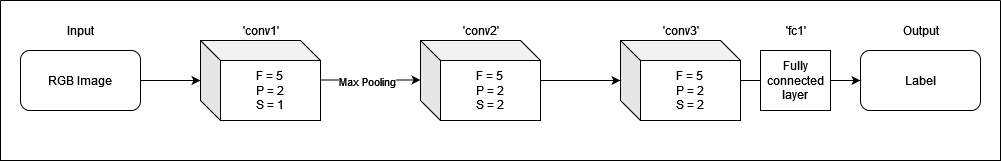

In [10]:
Image(filename=root_path+'/Images/model_architecture.png')   # displaying our model's architecture

In [ ]:
# Run the main function
! python /content/gdrive/MyDrive/Universiteit/PatternRecognition/Assignments/Lab2/ResNet18_cifar10_lab2/main_modified.py  # Change 'your_project_folder' to your project folder

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           2,432
       BatchNorm2d-2           [-1, 32, 32, 32]              64
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4             [-1, 64, 8, 8]          51,264
       BatchNorm2d-5             [-1, 64, 8, 8]             128
            Conv2d-6            [-1, 128, 4, 4]         204,928
       BatchNorm2d-7            [-1, 128, 4, 4]             256
            Linear-8                   [-1, 10]          20,490
Total params: 279,562
Trainable params: 279,562
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.66
Params size (MB): 1.07
Estimated Total Size 

In [ ]:
# Run the main function
! python /content/gdrive/MyDrive/Universiteit/PatternRecognition/Assignments/Lab2/ResNet18_cifar10_lab2/main_modified.py  # Change 'your_project_folder' to your project folder

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0
 [================================================================>]  Step: 86ms | Tot: 15s516ms | Loss: 2.103 | Acc: 28.450% (14225/50000) 391/391 
 [================================================================>]  Step: 8ms | Tot: 1s865ms | Loss: 1.723 | Acc: 38.840% (3884/10000) 100/100 
Saving..

Epoch: 1
 [================================================================>]  Step: 11ms | Tot: 15s325ms | Loss: 1.572 | Acc: 42.002% (21001/50000) 391/391 
 [================================================================>]  Step: 2ms | Tot: 1s958ms | Loss: 1.424 | Acc: 48.280% (4828/10000) 100/100 
Saving..

Epoch: 2
 [==========================================

Averaged training accuracy: 75.4 +/- 0.3%
Averaged test accuracy: 72.7 +/- 2.0%



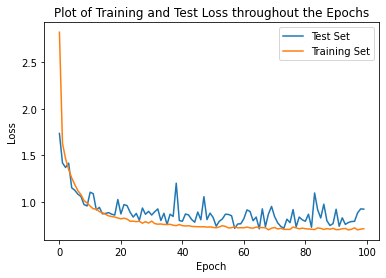

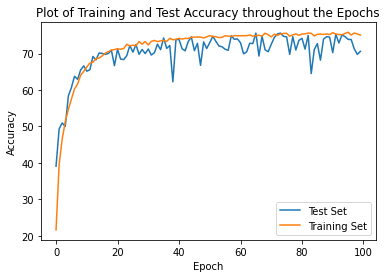

In [11]:
# Loading in the results from the previous step.
df = pd.read_csv(root_path+'Results/results_Q3.csv')

nr_epochs = 100
# Mean training accuracy over last 10% epochs.
mean_train_acc = np.mean(df['Training Accuracy'][-int(nr_epochs*0.1):])
# Standard deviation in training accuracy over last 10% epochs.
std_train_acc = np.std(df['Training Accuracy'][-int(nr_epochs*0.1):])
print("Averaged training accuracy: {:.1f} +/- {:.1f}%".format(mean_train_acc, std_train_acc))
# Mean test accuracy over last 10% epochs.
mean_test_acc = np.mean(df['Test Accuracy'][-int(nr_epochs*0.1):])
# Standard deviation in test accuracy over last 10% epochs.
std_test_acc = np.std(df['Test Accuracy'][-int(nr_epochs*0.1):])
print("Averaged test accuracy: {:.1f} +/- {:.1f}%".format(mean_test_acc, std_test_acc))

print()

# Plotting the training and test loss throughout the epochs.
fig_loss = plt.figure()
frame_loss = fig_loss.add_subplot(1, 1, 1)
frame_loss.plot(df['Epoch'], df['Test Loss'], label='Test Set')
frame_loss.plot(df['Epoch'], df['Training Loss'], label='Training Set')
frame_loss.set_xlabel('Epoch')
frame_loss.set_ylabel('Loss')
frame_loss.set_title('Plot of Training and Test Loss throughout the Epochs')
frame_loss.legend()

# Plotting the training and test accuracy throughout the epochs.
fig_acc = plt.figure()
frame_acc = fig_acc.add_subplot(1, 1, 1)
frame_acc.plot(df['Epoch'], df['Test Accuracy'], label='Test Set')
frame_acc.plot(df['Epoch'], df['Training Accuracy'], label='Training Set')
frame_acc.set_xlabel('Epoch')
frame_acc.set_ylabel('Accuracy')
frame_acc.set_title('Plot of Training and Test Accuracy throughout the Epochs')
frame_acc.legend()

plt.show()

# <span style="color:blue">Contributions<a class="anchor" id="chapter4"></a></span>

For this assignment, we have worked through each exercise together such that each solution contains equal input from the both of us.

# <span style="color:blue">References<a class="anchor" id="chapter4"></a></span>

[1] Krizhevsky, A. (2009). *Learning Multiple Layers of Features from Tiny Images*

[2] Torch Contributors. (n.d.). torchvision — Torchvision main documentation. Retrieved December 19, 2022, from https://pytorch.org/vision/stable/index.html

[3] (2018, November 14). Visualize feature map. PyTorch Forums. Retrieved December 19, 2022, from https://discuss.pytorch.org/t/visualize-feature-map/29597

[4] Bornstein, A., Soshnikov, D., Breviu, C., Juarez, S., & Subramanian, S. (n.d.). Optimizing Model Parameters — PyTorch Tutorials 1.13.0+cu117 documentation. Retrieved December 19, 2022, from https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html